In [169]:
%pylab
        # aktiviert matplotlib - Funktionen können ohne Modulnamen aufgerufen werden 
        # (statt matplotlib.pylab.plot einfach nur plot)
%matplotlib inline 
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
matplotlib.rc('axes', labelsize=14) 
matplotlib.rc('axes', titlesize=16) 

from mpl_toolkits.basemap import Basemap # Zum Plotten mit geografischen Projektionen
import time

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


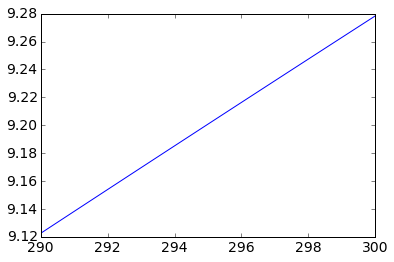

In [2]:
T=290+numpy.linspace(0,10,101)
kB=1.38e-23
L=6.02e23
m=28.95/L
vmod=sqrt(kB*T/m)
plot(T,vmod)
for i in range(T.shape[0]):
    qr=kB*T[i]/m
    pdf=randn(1000)
    

(array([   8.,   27.,   86.,  187.,  251.,  236.,  138.,   56.,    9.,    2.]),
 array([-3.14822116, -2.48622483, -1.8242285 , -1.16223218, -0.50023585,
         0.16176048,  0.8237568 ,  1.48575313,  2.14774946,  2.80974578,
         3.47174211]),
 <a list of 10 Patch objects>)

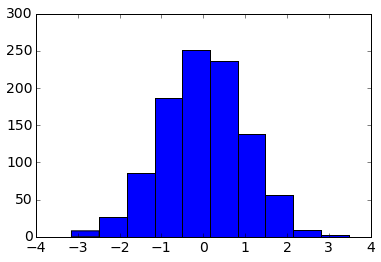

In [3]:
hist(pdf)

<type 'numpy.ndarray'>


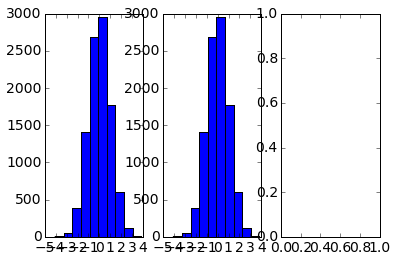

In [4]:
n=100
T=randn(n*n)
Tsort=sort(T)
N=arange(n)
print type(Tsort)
subplot(1,3,1)
hist(T)
subplot(1,3,2)
hist(Tsort)
subplot(1,3,3)
#plot(Tsort,N)


In [5]:
T2=T.reshape((n,n))
Tsort2=Tsort.reshape((n,n))
NX,NY=meshgrid(N.copy(),N.copy())
NTOT=NX+NY

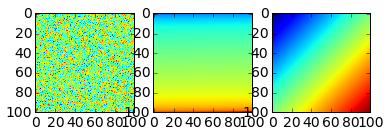

In [6]:
subplot(1,3,1)
imshow(T2)
subplot(1,3,2)
imshow(Tsort2)
subplot(1,3,3)
imshow(NTOT)

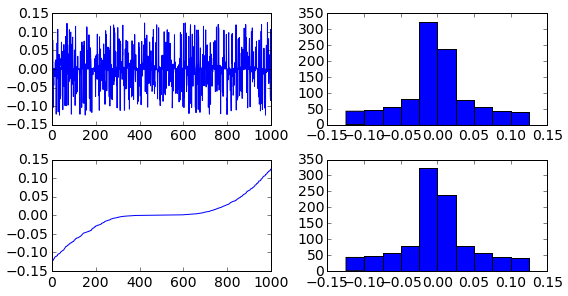

In [7]:
n=1000
T=(rand(n)-0.5)**3
Tsort=sort(T)
#Tsort=roll(Tsort,n/2)
t=arange(n)/100.
Tareg=T-T
a=0.5
for i in range(1,n):
    Tareg[i]=a*Tareg[i-1]+T[i]
Tareg/=std(Tareg)
Tt=(T,Tsort)
ft=(plot,hist)
figure(figsize=(8,6))
l=0
for tu in Tt:
    for f in ft:
        l+=1
        subplot(3,2,l)
        f(tu)

tight_layout()
savefig('stoch.eps')
#subplot(3,2,1)
#hist(T)
#subplot(3,2,2)
#plot(T)
#subplot(3,2,3)
#hist(Tsort)
#subplot(3,2,4)
#plot(Tsort)
#subplot(3,2,5)
#hist(Tareg)
#subplot(3,2,6)
#plot(Tareg)


In [8]:
n=0
m=0
for i in range(1,7):
    for j in range(1,7):
        for k in range(1,7):
            if i+j+k==9:
                print i,j,k
                n+=1
                if i*j*k==15:
                    m+=1
print m,n

1 2 6
1 3 5
1 4 4
1 5 3
1 6 2
2 1 6
2 2 5
2 3 4
2 4 3
2 5 2
2 6 1
3 1 5
3 2 4
3 3 3
3 4 2
3 5 1
4 1 4
4 2 3
4 3 2
4 4 1
5 1 3
5 2 2
5 3 1
6 1 2
6 2 1
6 25


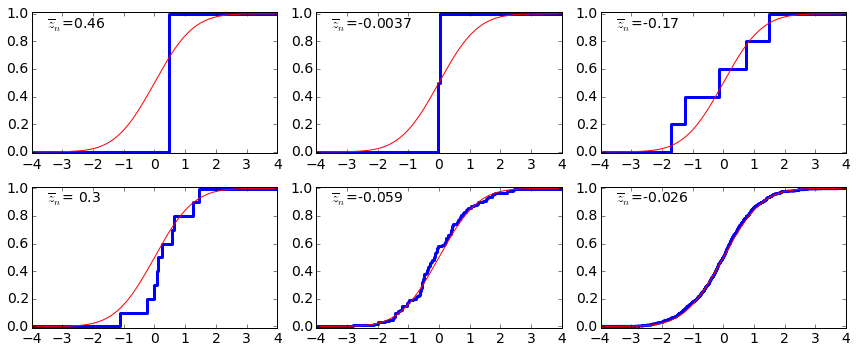

In [9]:
from scipy.stats import norm
umfaenge=[1,2,5,10,100,1000]
stichproben=10000
l=1
figure(figsize=[12,5])
for n in umfaenge:
    x=empty(n+2)
    y=empty(n+2)
    x[1:-1]=sort(randn(n))
    y[1:-1]=arange(n,dtype='float')/n
#    print x
    subplot(2,3,l)
    x[0]=-4
    x[-1]=4
    y[0]=0.001
    y[-1]=0.999
    step(x,y,lw=3)
    text(-3.5,0.9,r'$\overline{z}_n$='+'{0:4.2}'.format(mean(x[1:-1])),size=14)

    x=linspace(-4,4,801)
    plot(x,norm.cdf(x),'r')
    xlim(-4.,4.)
    ylim(-0.01,1.01)
    l=l+1
    
tight_layout()
savefig('stichprobenverteilung.eps')

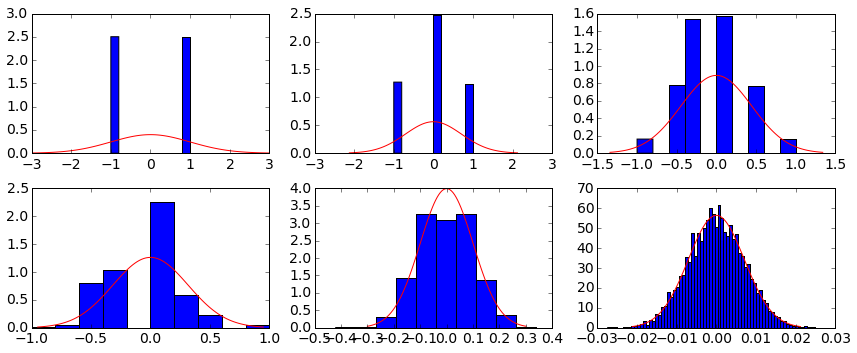

In [10]:
umfaenge=[1,2,5,10,100,20000]
stichproben=10000
l=1
figure(figsize=[12,5])
for n in umfaenge:
    xn=empty(stichproben)
    for i in range(stichproben):
        x=randint(0,2,n)*2-1
#        print x
        xn[i]=mean(x)
    subplot(2,3,l)
    hist(xn,normed=1,bins=max(10,sqrt(n)/2))
    xnorm=linspace(-3/sqrt(n),3/sqrt(n),101)
    plot(xnorm,normpdf(xnorm,0,1./sqrt(n)),'r')
    l=l+1
    
tight_layout()
savefig('grenzwertsatz.eps')

[ 0.21969564  0.21969564  0.10377687]


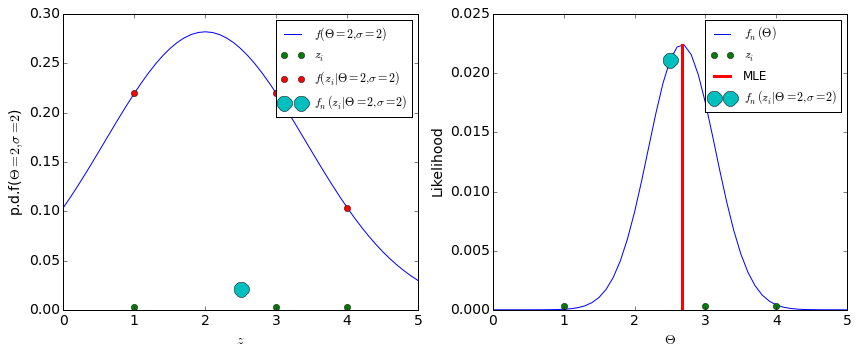

In [11]:
x=asarray([1,3,4],dtype='float')
sigma=2.
def likelihood(x,mu):
    fn=1/sqrt(2*pi*sigma)**x.shape[0]*exp(-1/2/sigma/sigma*(sum(x-mu)**2))
    return fn

mu=linspace(0,5,51)
fn=mu-mu
fn2=mu-mu
for i in range(mu.shape[0]):
    fn[i]=likelihood(x,mu[i])

for i in range(mu.shape[0]):
    fn2[i]=likelihood(asarray([2]),mu[i])

fn3=x-x
for i in range(x.shape[0]):
    fn3[i]=likelihood(asarray([2]),x[i])

print fn3
figure(figsize=(12,5))
subplot(1,2,1)
a,=plot(mu,fn2,label='$f(\Theta=2,\sigma=2)$')
b,=plot(x,x-x+0.003,'o',label='$z_i$')
c,=plot(x,fn3,'o',label=r'$f(z_i|\Theta=2,\sigma=2)$')
d,=plot([2.5],fn[25],'o',label=r'$f_n(z_i|\Theta=2,\sigma=2)$',markersize=15)

xlabel(r'$z$')
ylabel(r'p.d.f($\Theta=2,\sigma=2$)')
legend(handles=[a,b,c,d])
subplot(1,2,2)
a,=plot(mu,fn,label='$f_n(\Theta)$')
b,=plot(x,x-x+0.0003,'o',label='$z_i$')
c,=plot([mean(x),mean(x)],[0,max(fn)],lw=3,label='MLE')
d,=plot([2.5],fn[25],'o',label=r'$f_n(z_i|\Theta=2,\sigma=2)$',markersize=15)
xlabel(r'$\Theta$')
ylabel('Likelihood')
legend(handles=[a,b,c,d])
tight_layout()
savefig('likelihood.eps')

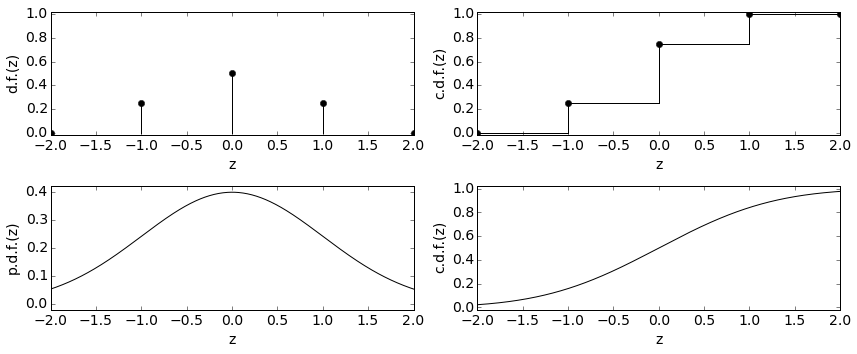

In [12]:
figure(figsize=(12,5))
subplot(2,2,1)
x=asarray([-2,-1,0,1,2])
fx=asarray([0,1,2,1,0])/4.
cfx=cumsum(fx)
plot(x,fx,'ko')
for i in range(x.shape[0]):
    plot([x[i],x[i]],[0,fx[i]],'k-')
xlabel('z')
ylabel('d.f.(z)')
xlim([-2,2])
ylim([-0.02,1.02])

subplot(2,2,2)
plot(x,cfx,'ko')
for i in range(1,x.shape[0]):
    plot([x[i],x[i]],[cfx[i-1],cfx[i]],'k-')
    plot([x[i],x[i-1]],[cfx[i-1],cfx[i-1]],'k-')
xlabel('z')
ylabel('c.d.f.(z)')
xlim([-2,2])
ylim([-0.02,1.02])

subplot(2,2,3)
x=linspace(-4,4.0,801)
fx=norm.pdf(x)
cfx=norm.cdf(x)
#print x,fx
plot(x,fx,'k')
xlabel('z')
ylabel('p.d.f.(z)')
xlim([-2,2])
ylim([-0.02,0.42])

subplot(2,2,4)
plot(x,cfx,'k')
xlabel('z')
ylabel('c.d.f.(z)')
xlim([-2,2])
ylim([-0.02,1.02])
tight_layout()
savefig('dfs.eps')

(-0.2, 10.2)

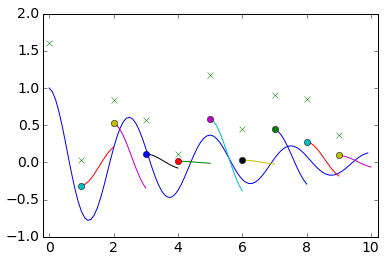

In [13]:
a=-0.2
w=2.5
n=100
sigma=0.2
sigmaf=0.2
t=arange(n)/10.
x=exp(a*t)*cos(w*t)
obs=x+0.6+randn(n)*sigma
plot(t,x)
plot(t[::10],obs[::10],'x')

xb=x[10]
for i in range(10,n,10):
    xa=(obs[i]*sigmaf*sigmaf+xb*sigma*sigma)/(sigma*sigma+sigmaf*sigmaf)
    tf=arange(11)/10.
    xf=xa*exp(a*tf)*cos(w*tf)
    plot(t[i]+tf,xf)
    xb=xf[-1]
    plot([t[i]],[xf[0]],'o')
xlim(-0.2,10.2)

In [149]:
from numpy import *
from matplotlib.pylab import *
def rhs(T,t,C,delta,eps):
    #rhs berechnet die rechte Seite des 0D-Energiebilanzmodells in Kap. 3
    #T=Temperatur zum Zeitpunkt T /K
    #t=Zeit /s
    #C=Effektive flächenspezifische Wärmekapazität /JK-1m^-2
    #delta=Amplitude der Einstrahlungsschwankungen
    #eps=Effektive Emissivität des Bodens
    sol=1361. #Solarkonstante / Wm^-2
    alb=0.31  # Albedo
    boltz=5.67e-8  #Boltzmannkonstante /Wm^-2K^-4
    omega=2*pi/86400 #Frequenz der Einstrahlungsschwankungen /s^-1
    
    sa=delta*cos(omega*t)
    rs=(sol*(1-alb)/4*(1+sa))/C #Einstrahlung /Ks^-1
    if sa<0:
        sa=0
#    rs=(sol*(1-alb)/4*(3.1*sa/delta))/C #Einstrahlung /Ks^-1
    rt=-(eps*boltz*T**4)/C   # Ausstrahlung /Ks^-1
    re=rs+rt #
    
    return rs,rt,re

def propagator(t,T0,C,delta,eps):
    #Propagator des Energiebilanzmodells
    #implementiert mit einem einfachen Heun-Schema
    #Nicht nur die Zustände, auch die Haushaltsterme werden zurückgegeben.
    #t=Vektor der Zeitpunkte /s
    #T0=Anfangszustand /K
    n=t.shape[0]
    T=t-t
    r,rs,rt=T.copy(),T.copy(),T.copy()
    dt=t[1]-t[0]
    T[0]=T0
    for i in range(n-1):
        #Prädiktorschritt
        rs[i],rt[i],r[i]=rhs(T[i],t[i],C,delta,eps)
        T[i+1]=T[i]+dt*r[i]
        #Korrektorschritt
        rs[i+1],rt[i+1],r[i+1]=rhs(T[i+1],t[i+1],C,delta,eps)
        T[i+1]=T[i]+0.5*dt*(r[i]+r[i+1])
    
    return T,rs,rt,r



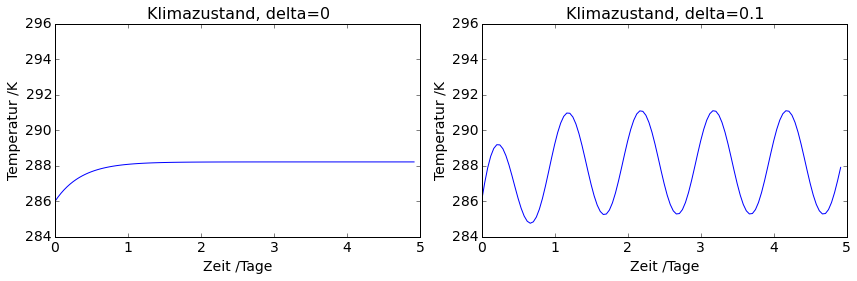

In [170]:
# Parameterwahl für Energiebilanzmodell
n=120 # Anzahl Zeitschritte
t=numpy.arange(n)*3600.  # Vektor der Zeitpunkte, Zeitschritt 1 Stunde
T0=286. # Anfangstemperatur /K
delta=0 # Stärke des Tagesgangs
eps=0.6   # Effektive Emissivität
C=1.e5    # Effektive flächenspezifische Wärmekapazität /JK^-1m^-2

figure(figsize=(12,4))
yrange=[284,296]
# Kein Tagesgang
Tu,rsu,rtu,r=propagator(t,T0,C,delta,eps)
subplot(1,2,1)
plot(t[0:-1]/86400,Tu[0:-1])
title('Klimazustand, delta=0')
xlabel('Zeit /Tage')
ylabel('Temperatur /K')
ylim(yrange)
# Mit Tagesgang
delta=0.1
T,rs,rt,r=propagator(t,T0,C,delta,eps)
subplot(1,2,2)
plot(t[0:-1]/86400,T[0:-1])
title('Klimazustand, delta={}'.format(delta))
xlabel('Zeit /Tage')
ylabel('Temperatur /K')
ylim(yrange)
tight_layout()
savefig('ebilclim.eps')


0.99519866553 0.123891183837 4.47764470034


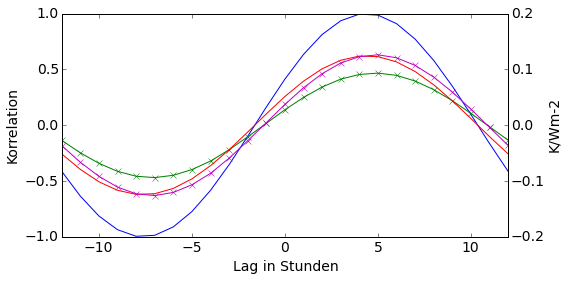

In [327]:
# Plotten der Kreuzkorrelationsfunktion des Klimamodelles mit Antrieb
n=1000 # Anzahl Zeitschritte
t=numpy.arange(n)*3600.  # Vektor der Zeitpunkte, Zeitschritt 1 Stunde
T0=286. # Anfangstemperatur /K
delta=0.1 # Stärke des Tagesgangs
eps=0.6   # Effektive Emissivität
C=1.e5    # Effektive flächenspezifische Wärmekapazität /JK^-1m^-2

yrange=[284,296]
Tu,rsu,rtu,r=propagator(t,T0,C,delta,eps)
Tu=Tu[100:] # Wegwerfen des Einschwingens
rsu=rsu[100:]
figure(figsize=(8,4))
axL = subplot(1,1,1,frameon=True)
maxlag=12
c=numpy.empty(2*maxlag+1)
tlin=numpy.empty(2*maxlag+1)
for ilag in range(maxlag+1):
    c[ilag+maxlag]=numpy.corrcoef(rsu[:rsu.shape[0]-ilag],Tu[ilag:])[0,1]
    c[maxlag-ilag]=numpy.corrcoef(rsu[ilag:],Tu[:rsu.shape[0]-ilag])[0,1]
    tlin[ilag+maxlag]=numpy.polyfit(rsu[:rsu.shape[0]-ilag],Tu[ilag:],1)[0]
    tlin[maxlag-ilag]=numpy.polyfit(rsu[ilag:],Tu[:rsu.shape[0]-ilag],1)[0]

Tu=Tu+randn(Tu.shape[0])*4
cr=c.copy()
tlinr=tlin.copy()
for ilag in range(maxlag+1):
    cr[ilag+maxlag]=numpy.corrcoef(rsu[:rsu.shape[0]-ilag],Tu[ilag:])[0,1]
    cr[maxlag-ilag]=numpy.corrcoef(rsu[ilag:],Tu[:rsu.shape[0]-ilag])[0,1]
    tlinr[ilag+maxlag]=numpy.polyfit(rsu[:rsu.shape[0]-ilag],Tu[ilag:],1)[0]
    tlinr[maxlag-ilag]=numpy.polyfit(rsu[ilag:],Tu[:rsu.shape[0]-ilag],1)[0]

axL.plot(range(-maxlag,maxlag+1),c,label=u'Korr.,kein Lärm')
axL.plot(range(-maxlag,maxlag+1),cr,'g-x',label=u'Korr.,Lärm')
xlim([-maxlag,maxlag])
xlabel('Lag in Stunden')
ylabel('Korrelation')
ylim(-1,1)
axR = axL.twinx()
axR.plot(range(-maxlag,maxlag+1),tlin/C,'r',label=u'Reg, kein Lärm')
axR.plot(range(-maxlag,maxlag+1),tlinr/C,'m-x',label=u'Reg, Lärm')
axR.yaxis.tick_right()
ylabel('K/Wm-2')
yl=asarray([-0.02,-0.01,0,0.01,0.02])*10
ylim(yl[0],yl[4])
yticks(yl)
xlim([-maxlag,maxlag])
#legend()
savefig("kreuzkorr.eps")
print max(c),max(tlin/C),std(Tu)

In [152]:
#Analysezyklus mit Beobachtungen alle 6 Stunden
def anzyk(ta,Tobs,var_b,var_o,C,delta,eps):
    for i in range(n/6):
        tb=asarray(ta[i]+arange(7)*3600)
        if i>0:
            Tana=(Tobs[i]*var_b+Tb[-1]*var_o)/(var_o+var_b)
        else:
            Tana=Tobs[0]

        Tab[i]=Tana
        Tb,rsb,rtb,rb=propagator(tb,Tana,C,delta,eps)
        Tbb[i]=Tb[-1]
        rsa[i]=rsb[0]
        plot(tb/86400,Tb,'k-')
        plot(tb[0]/86400,Tana,'or')
        
    return Tab,Tbb,rsa


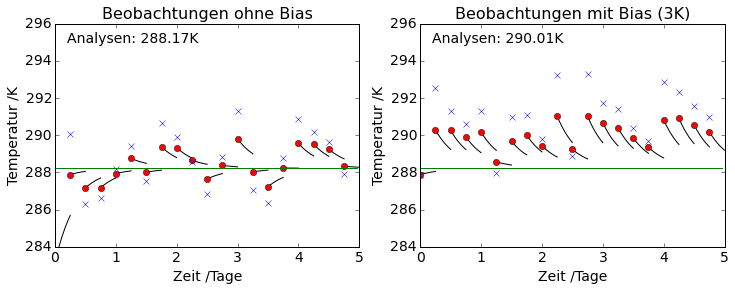

In [171]:
# Datenassimilationsexperiment
# Beobachtungen mit Bias
# Kein Tagesgang
# Analyse alle 6 Stunden
bias=0 # Angenommener Bias in den Beobachtungen
Tobs=Tu[::6]+bias+2*randn(n/6)
ta=t[::6]
Tana=(Tobs[0]+Tu[0])/2.
Tab,Tbb,rsa=ta-ta,ta-ta,ta-ta
var_o=2**2
var_b=2**2

figure(figsize=(12,4))
subplot(1,2,1)
delta=0
Tab,Tbb,rsa=anzyk(ta,Tobs,var_b,var_o,C,delta,eps)
plot(ta/86400,Tobs,'x')
plot([t[0]/86400,t[-1]/86400],[Tu[n-1],Tu[n-1]],'g')
ylim(yrange)
title('Beobachtungen ohne Bias')
text(0.2,295,'Analysen: {0:4.2f}K'.format(mean(Tab)),fontsize=14)
ylabel('Temperatur /K')
xlabel('Zeit /Tage')

subplot(1,2,2)
bias=3 # Angenommener Bias in den Beobachtungen
Tobs=Tu[::6]+bias+2*randn(n/6)
Tab,Tbb,rsa=anzyk(ta,Tobs,var_b,var_o,C,delta,eps)
plot(ta/86400,Tobs,'x')
plot([t[0]/86400,t[-1]/86400],[Tu[n-1],Tu[n-1]],'g')
ylim(yrange)
title('Beobachtungen mit Bias (3K)')
text(0.2,295,'Analysen: {0:4.2f}K'.format(mean(Tab)),fontsize=14)
ylabel('Temperatur /K')
xlabel('Zeit /Tage')
savefig('Analysezyklus.eps')

0.586346918281 0.581967315798 0.562092535629 -4.18119345349 234.7725


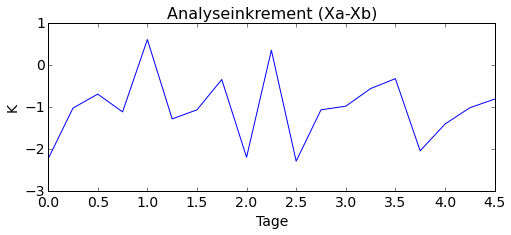

In [174]:
dtend=C*(Tab[1:]-Tab[:-1])/(ta[1]-ta[0])
dtendb=C*(Tbb[:-1]-Tab[:-1])/(ta[1]-ta[0])
drsa=C*(rsa[1:]+rsa[:-1])/2.
drst=(-drsa-dtend)
drstb=(-drsa-dtendb)
#plot(ta[:-1]/86400,dtend)
#plot(ta[:-1]/86400,dtendb)
figure(figsize=(8,3))
plot(ta[:-1]/86400,(dtendb-dtend)/C*(ta[1]-ta[0]))
title('Analyseinkrement (Xa-Xb)')
ylabel('K')
xlabel('Tage')
savefig('Analyseinkrement.eps')
yticks(arange(-3,2))
#plot(ta[:-1]/86400,drst+drsa)
#plot(ta[:-1]/86400,drsa)
#epsd=-drst/boltz/((Ta[:-1]+Ta[1:])/2)**4
epsda=-drst/boltz/((Tab[:-1]+Tab[1:])/2)**4
epsdb=-drstb/boltz/((Tbb[:-1]+Tbb[1:])/2)**4
#print epsd
print mean(epsda),mean(epsdb),mean(dtend),mean(dtendb),mean(drsa)

In [216]:
h=6.62e-34
k=1.38e-23
c=3e8
lam=1e-5

def hop(lam,T):
    
    L=(2*h*c**2/lam**5)/(numpy.exp(h*c/(lam*k*T))-1)
    
    return L

def dhop(lam,Tb):
    
    dL=2*h**2*c**3/(lam**6*k*Tb**2)*(exp(h*c/(lam*k*Tb))-1)**(-2)*exp(h*c/(lam*k*Tb))
    
    return dL

def hopinv(lam,L):
    # Bisection
    eps=0.1
    i=0
    Ta=100
    Tb=1000
    if hop(lam,Ta)>L or hop(lam,Tb)<L:
        print'L ungültig'
        return nan
    Li=0
    while abs(L-Li)>eps:
        Tc=(Ta+Tb)/2.
        Li=hop(lam,Tc)
        if sign(Li-L) == sign(hop(lam,Ta)-L):
            Ta=Tc 
        else:
            Tb = Tc # new interval
        i+=1
        if i>100:
            return nan
    return Tc

Tb=290.
Lo=1.e7
print 'L(lambda={:4.4},Tb={:4.1f}): {:4.4}/Wm^-2sr^-1m^-1 '.format(lam,Tb,hop(lam,Tb))
print 'H(L)-Lo:{:4.4}'.format(Lo-hop(lam,Tb))

To=hopinv(1.e-5,Lo)
print 'T(Lo={}):{:4.4}'.format(Lo,To)
print "H'(T-Tb):{:4.4}".format(dhop(lam,Tb)*(To-Tb))

L(lambda=1e-05,Tb=290.0): 8.394e+06/Wm^-2sr^-1m^-1 
H(L)-Lo:1.606e+06
T(Lo=10000000.0):300.5
H'(T-Tb):1.522e+06


34.3750997613 690 [   1.50592261  307.28465087] [  1.22672310e-02   7.96467749e-01   3.14162315e+02]


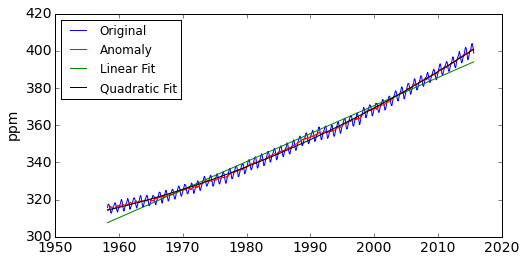

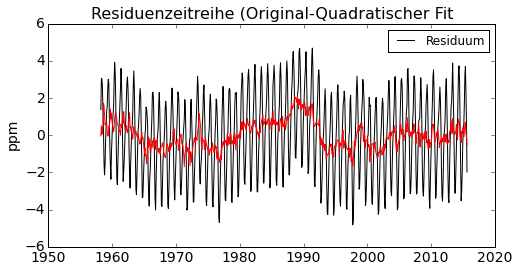

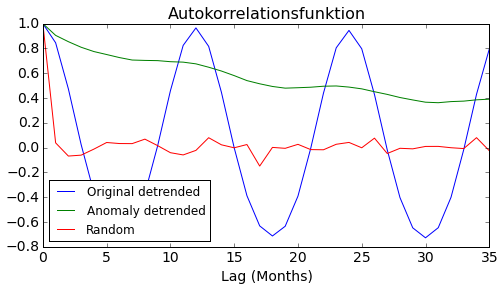

In [245]:
import urllib
# Lesen der CO2-Daten
response = urllib.urlopen('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt')
data = response.read()
lines=data.splitlines()
n=0
for l in lines:
    if l[0]=='#':
        n+=1
    else:
        break

ndat=len(lines)-n
data=' '.join(lines[n:])

array=numpy.fromstring(data,sep=' ')
array=array.reshape([ndat,7])
array[array<-90.]=numpy.nan
co2=array.copy()

# Plotten der Zeitreihe und der Anomalien
figure(figsize=(8,4))
columns=['year','month','decimal year','CO2_orig','CO2_int','CO2_trend','days']
plt.plot(co2[:,2],co2[:,4])
tlin=numpy.polyfit(co2[:,2]-1958,co2[:,4],1)
tquad=numpy.polyfit(co2[:,2]-1958,co2[:,4],2)

resid2=co2[:,4]-(tquad[2]+tquad[1]*(co2[:,2]-1958)+tquad[0]*(co2[:,2]-1958)**2)
anom=resid2.copy()
for i in range(12):
    anom[i::12]-=numpy.mean(resid2[i::12])

anom+=(tquad[2]+tquad[1]*(co2[:,2]-1958)+tquad[0]*(co2[:,2]-1958)**2)
plot(co2[:,2],anom,'r-')


plot(co2[:,2],tlin[1]+tlin[0]*(co2[:,2]-1958),'g-')
plot(co2[:,2],tquad[2]+tquad[1]*(co2[:,2]-1958)+tquad[0]*(co2[:,2]-1958)**2,'k-')
legend(['Original','Anomaly','Linear Fit','Quadratic Fit'],loc='best')
ylabel('ppm')
savefig('co2trend.eps')
#
# Plotten der Residuen
figure(figsize=(8,4))
resid=anom-(tquad[2]+tquad[1]*(co2[:,2]-1958)+tquad[0]*(co2[:,2]-1958)**2)
resid2=co2[:,4]-(tquad[2]+tquad[1]*(co2[:,2]-1958)+tquad[0]*(co2[:,2]-1958)**2)
plot(co2[:,2],resid2,'k-')
plot(co2[:,2],resid,'r-')
title('Residuenzeitreihe (Original-Quadratischer Fit')
ylabel('ppm')
legend(['Residuum'],loc='best')
savefig('co2resid.eps')

# Plotten der Autokorrelationsfunktion
figure(figsize=(8,4))
maxlag=36
c=numpy.empty(maxlag)
d=numpy.empty(maxlag)
dz=numpy.empty(maxlag)
zufall=numpy.random.randn(anom.shape[0])
for ilag in range(maxlag):
    d[ilag]=numpy.corrcoef(resid2[:resid.shape[0]-ilag],resid2[ilag:])[0,1]
    c[ilag]=numpy.corrcoef(resid[:resid.shape[0]-ilag],resid[ilag:])[0,1]
    dz[ilag]=numpy.corrcoef(zufall[:resid.shape[0]-ilag],zufall[ilag:])[0,1]

plot(d)
plot(c)
plot(dz)
title('Autokorrelationsfunktion')
xlabel('Lag (Months)')
legend(['Original detrended','Anomaly detrended','Random'],loc='best')
savefig('co2autocorr.eps')

neff=resid.shape[0]*(1-c[1])/(1+c[1])
print neff,resid.shape[0],tlin


##### Vorrat

In [ ]:
def leapfrog(t,T0):
    n=t.shape[0]
    T=t-t
    T[0]=T0
    r=t-t
    rs=t-t
    rt=t-t
    rs[0],rt[0],r[0]=rhs(T[0],t[0],delta,eps)
    T[1]=T[0]+1*(t[1]-t[0])*r[0]
#T[1]=T[1]+(t[1]-t[0])*rhs(T[1],(t[0]+t[1])/2.,delta,eps)
    for i in range(1,n-1):
        rs[i],rt[i],r[i]=rhs(T[i],t[i],delta,eps)
        if i%10==0:
            T[i+1]=T[i]+0.5*(t[1]-t[0])*r[i]
            rs[i+1],rt[i+1],r[i+1]=rhs(T[i+1],(t[i]+t[i+1])/2.,delta,eps)
            T[i+1]=T[i]+(t[1]-t[0])*r[i+1]
        else:    
            T[i+1]=T[i-1]+2*(t[1]-t[0])*r[i]
            
    return T,rs,rt,r


[ 0.76142555  0.72789702  0.71312921  0.70592677  0.70267722  0.70120957
  0.70054667  0.70024705  0.70011166  0.70005046  0.70002281  0.70001031
  0.70000466  0.70000211  0.70000095  0.70000043  0.70000019  0.70000009
  0.70000004  0.70000002  0.70000001  0.7         0.7         0.7       ]
0.704719283312


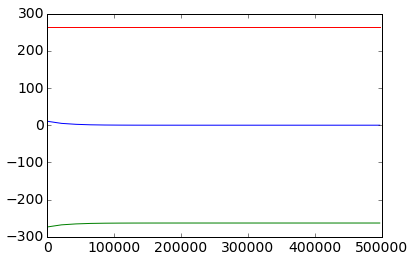

In [37]:
C=1.e5
boltz=5.67e-8  #W/m^2K^4
aint=6
ta=t[::6]
Ta=T[::6]
rsa=rs[::6]
dtend=C*(Ta[1:]-Ta[:-1])/(ta[1]-ta[0])
drsa=C*(rsa[1:]+rsa[:-1])/2.
drst=(-drsa-dtend)
plot(ta[:-1],dtend)
plot(ta[:-1],drst)
plot(ta[:-1],drsa)
epsd=-drst/boltz/((Ta[:-1]+Ta[1:])/2)**4
print epsd
print mean(epsd) 